## Trabajo No. 3

### Sobre: Lógica borrosa
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

Para la solución del problema planteado, encontramos un Dataset público (https://www.kaggle.com/c/instacart-market-basket-analysis), este Dataset nos proporciona una amplia información sobre las compras de los productos para el hogar, productos para las mascotas entre otros productos. Con este Dataset se pretende extraer información que me permita deducir, si dos usuarios elegidos aleatoriamente, son similares o no, dependiendo de sus preferencias históricas de compras realizadas, en este caso en la plataforma de www.instacart.com

Cabe aclarar que también se pueden alquilar o comprar otros Dataset ya sea la preferencia o necesidad del problema

## Explicación Dataset
El Dataset que elegimos está compuesto por la siguiente información:
### 1. ailes.
Son los pasillos del supermercado en el cual se encuentra el producto, dentro de este encontramos un identificador único y el nombre del pasillo.
### 2. departments.
Este archivo son las clasificaciones de los productos, por ejemplo beberages, alcohol entre otros. En este podemos encontrar su identificador único y el nombre clasificatorio.
### 3. products.
Acá encontramos la información de los productos y esta se encuentra compuesta por el identificador único, nombre, en que pasillo se encuentra y como está clasificado el producto.
### 4. orders.
En esta encontraremos toda la información relacionada con las compras del usuario y está compuesta por el identificador único, el usuario, eval_set (nos dice si es anterior o actual la compra), número de la orden, hora de la compra y días desde la última compra.
### 5. order_products_prior & order_products_train.
Estos archivos son los que tienen la información combinada de las compras realizadas y está compuesta por el identificador de orders, el identificador del products, orden en que fue agregado al carrito de compras y si es primera vez en la compra de ese producto.
<hr/>

## Definición de características

A partir de la información del Dataset que ya definimos anteriormente, definimos algunas características para cada usuario que nos van a servir para realizar la comparación de similitud entre ellos. Vamos a ver entonces algunas características generales respecto al usuario.

<table width="100%">
    <tr>
        <th>Características personales</th>
        <th>Características situacionales</th>
        <th>Características de compras</th>
    </tr>
    <tr>
        <td>Sexo</td>
        <td>Fecha y Hora</td>
        <td>Clasificación/Categoría</td>
    </tr>
    <tr>
        <td>Edad</td>
        <td>Lugar o región</td>
        <td>Forma de pago</td>
    </tr>
    <tr>
        <td>Hobbies u ocupación</td>
        <td>--</td>
        <td>--</td>
    </tr>    
</table>

#### Nota:
Cabe aclarar que a pesar de definir acá las características personales y situacionales, no serán tenidas en cuenta para los conjuntos difusos de este problema; también que las características definidas para estos usuarios son deducidas, ya que en el Dataset no nos proporciona información suficiente del usuario para tener características mas concretas.

<hr/>

## Elemento de preferencia
Los elementos de preferencia se tomarán vectores de características, para nuestro caso las clasificaciones o categorías. <br/>
Las características que vamos a evaluar son las siguientes.
<ul>
    <li>Congelados (frozen)</li>
    <li>Panadería (bakery)</li>
    <li>Granos (bulk)</li>
    <li>Cuidado personal (personal care)</li>
    <li>Despensa (dentry)</li>
    <li>Productos enlatados (cannet goods)</li>
    <li>Aseo (household)</li>
    <li>Pasta de productos secos (Dry goods pasta)</li>
</ul>

Las características mencionadas son tanto para el usuario 1 como para el usuario 2.
<hr/>

## Conjuntos difusos de salida
Los conjuntos difusos de salida que podemos tomar son <b>1</b> en caso de que sean similares y <b>0</b> en caso de que sean distintos.


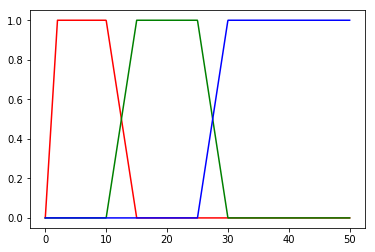

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def membership(x, membership_function, parameters):
    m_x = 0

    if(membership_function == "trapezoid"):
        a = float(parameters["a"])
        b = float(parameters["b"])
        c = float(parameters["c"])
        d = float(parameters["d"])

        if(x <= a or x >= d):
            m_x = 0
        elif(x >= a and x <= b):
            m_x = (x-a)/(b-a)
        elif(x > b and x < c):
            m_x = 1
        elif(x >= c and x < d):
            m_x = (d-x)/(d-c)

    elif(membership_function == "triangular"):
        a = float(parameters["a"])
        m = float(parameters["m"])
        b = float(parameters["b"])

        if(x <= a):
            m_x = 0
        elif(x > a and x <= m):
            m_x = (x-a)/(m-a)
        elif(x > m and x < b):
            m_x = (b-x)/(b-m)
        else:
            m_x = 0
    return m_x

def generate_fuzzy_set(X, membership_function, parameters):
    fuzzy_set = np.array([membership(x, membership_function, parameters) for x in X])
    return fuzzy_set

params_conjunto_baja = {"a":0, "b":2, "c":10, "d":15}
params_conjunto_media = {"a":10, "b":15, "c":25, "d":30}
params_conjunto_alta = {"a":25, "b":30, "c":60, "d":100}

resolucion = 1000
T = np.linspace(0, 50, resolucion)

conjunto_baja = generate_fuzzy_set(T, "trapezoid", params_conjunto_baja)
conjunto_media = generate_fuzzy_set(T, "trapezoid", params_conjunto_media)
conjunto_alta = generate_fuzzy_set(T, "trapezoid", params_conjunto_alta)

plt.plot(T,conjunto_baja, 'r')
plt.plot(T,conjunto_media, 'g')
plt.plot(T,conjunto_alta, 'b')
plt.show()